In [1]:
# import dependencies
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations
import matplotlib.pyplot as plt

In [2]:
# read in dataset as csv
df = pd.read_csv('sports_management_dataset.csv')
df.head()

,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Event Scale,Event Focus,Sustainability Score,Social Impact Level,Resource Efficiency,Event Type Classification
0,Moderate,High,High,Moderate Engagement,Moderate,Moderate Impact,Moderate,Moderate,High Efficiency,Local,Community Development,Low,High Engagement,Moderate Efficiency,Health-Oriented
1,High,Moderate,High,Moderate Engagement,Low,Low Impact,Moderate,Low,Moderate Efficiency,National,Community Development,Moderate,Low Engagement,Moderate Efficiency,Recreational
2,High,High,High,Low Engagement,High,Moderate Impact,Moderate,Moderate,Moderate Efficiency,National,Community Development,High,Low Engagement,High Efficiency,Recreational
3,High,High,High,Moderate Engagement,Moderate,Moderate Impact,Moderate,Moderate,Moderate Efficiency,Regional,Community Development,High,Low Engagement,High Efficiency,Recreational
4,Moderate,High,Low,Low Engagement,Low,Moderate Impact,High,High,High Efficiency,Regional,Community Development,Low,Moderate Engagement,Moderate Efficiency,Community Development


In [3]:
# get an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Energy Consumption           102000 non-null  object
 1   Carbon Emissions             102000 non-null  object
 2   Waste Generation             102000 non-null  object
 3   Community Engagement         102000 non-null  object
 4   Volunteer Participation      102000 non-null  object
 5   Health Impact                102000 non-null  object
 6   Water Usage                  102000 non-null  object
 7   Material Recycling Rate      102000 non-null  object
 8   Operational Cost Efficiency  102000 non-null  object
 9   Event Scale                  102000 non-null  object
 10  Event Focus                  102000 non-null  object
 11  Sustainability Score         102000 non-null  object
 12  Social Impact Level          102000 non-null  object
 13  Resource Effic

In [4]:
# check for number of unique values for each column to get an idea of how to encode the data
df.nunique()

Energy Consumption             3
Carbon Emissions               3
Waste Generation               3
Community Engagement           3
Volunteer Participation        3
Health Impact                  3
Water Usage                    3
Material Recycling Rate        3
Operational Cost Efficiency    3
Event Scale                    3
Event Focus                    4
Sustainability Score           3
Social Impact Level            3
Resource Efficiency            3
Event Type Classification      4
dtype: int64

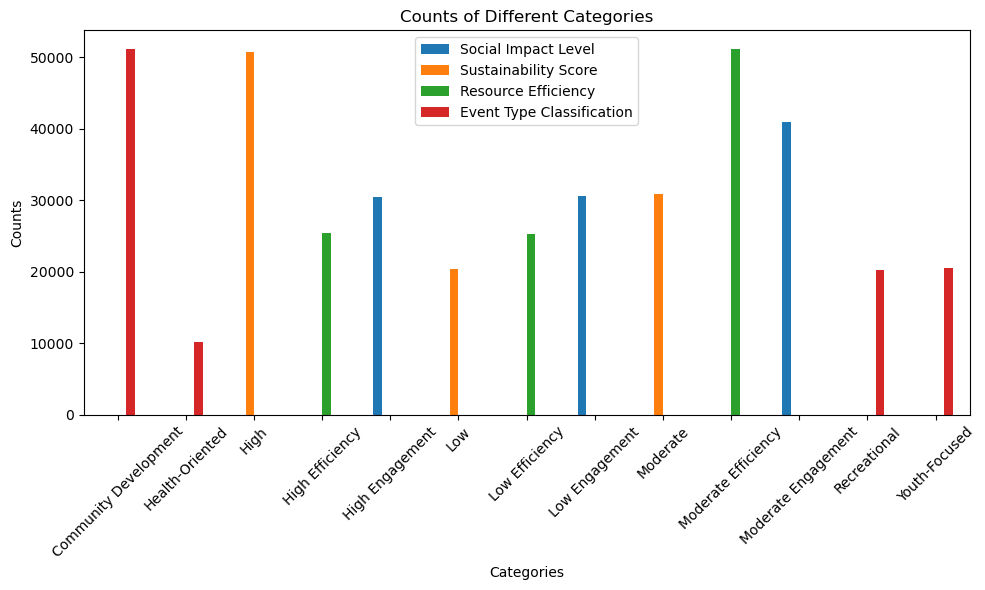

In [13]:
# # from the dataset's documentation we learned that the columns  'Sustainability Score',
# # 'Social Impact Level', 'Resource Efficiency', and 'Event Type Classification' were all target columns
# # let's get simple vizualization 
# impact_counts = df['Social Impact Level'].value_counts()
# sustainability_counts = df['Sustainability Score'].value_counts()
# resource_eff_counts = df['Resource Efficiency'].value_counts()
# event_class_counts = df['Event Type Classification'].value_counts()

# # # Combine all counts into a single DataFrame
# combined_counts = pd.DataFrame({
#     'Social Impact Level': impact_counts,
#     'Sustainability Score': sustainability_counts,
#     'Resource Efficiency': resource_eff_counts,
#     'Event Type Classification': event_class_counts
# })


# # Plot the combined counts
# combined_counts.plot(kind='bar', figsize=(10, 6))
# plt.title('Counts of Different Categories')
# plt.xlabel('Categories')
# plt.ylabel('Counts')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

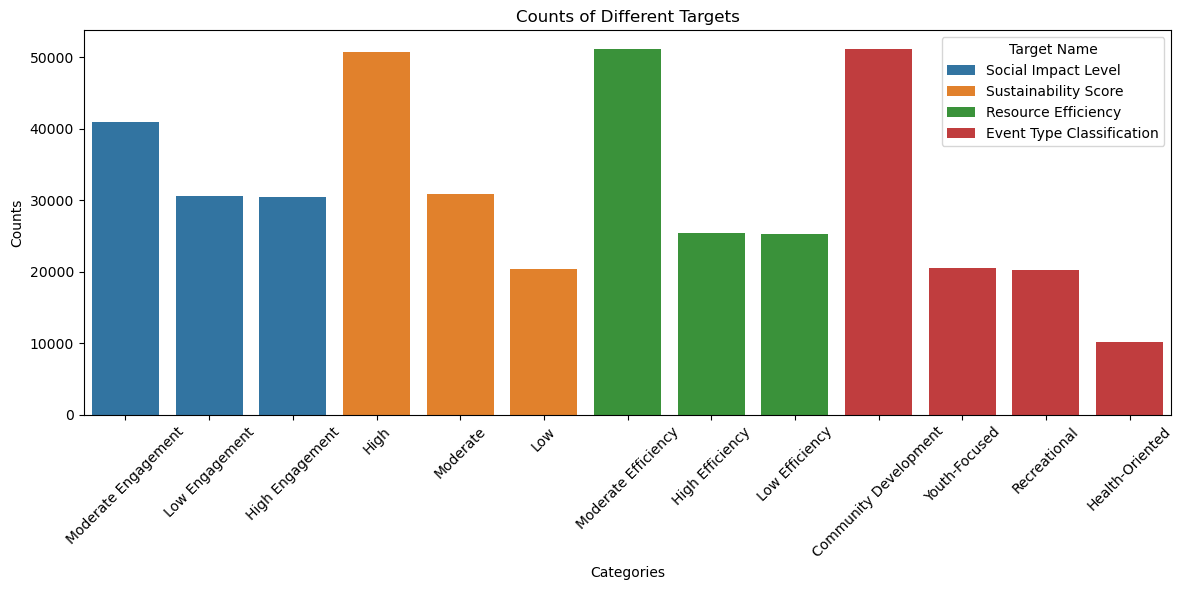

In [14]:
# from the dataset's documentation we learned that the columns  'Sustainability Score',
# 'Social Impact Level', 'Resource Efficiency', and 'Event Type Classification' were all target columns
# let's get simple vizualization to see if there is any imbalance 

# received help from Xpert Learning Assistant for codes realted to sns
import seaborn as sns


# Assuming df is your DataFrame
impact_counts = df['Social Impact Level'].value_counts().reset_index()
sustainability_counts = df['Sustainability Score'].value_counts().reset_index()
resource_eff_counts = df['Resource Efficiency'].value_counts().reset_index()
event_class_counts = df['Event Type Classification'].value_counts().reset_index()

# Rename columns for clarity
impact_counts.columns = ['Category', 'Count']
sustainability_counts.columns = ['Category', 'Count']
resource_eff_counts.columns = ['Category', 'Count']
event_class_counts.columns = ['Category', 'Count']

# Add a new column to identify the source of each count
impact_counts['Target Name'] = 'Social Impact Level'
sustainability_counts['Target Name'] = 'Sustainability Score'
resource_eff_counts['Target Name'] = 'Resource Efficiency'
event_class_counts['Target Name'] = 'Event Type Classification'

# Combine all counts into a single DataFrame
combined_counts = pd.concat([impact_counts, sustainability_counts, resource_eff_counts, event_class_counts])

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_counts, x='Category', y='Count', hue='Target Name')
plt.title('Counts of Different Targets')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# we can't use the correlation matrix for categorical values so let's try the chi-square test
# generate all possible combination pairs of column names
# help received from Xpert Learning Assistant for the 
# code related to the generation of a chi_sqaure test of independency 
column_combinations = combinations(df.columns, 2)

# Store results in a list
results = []
# Perform Chi-square test for each combination
# append the column names and chi^2 and p-values to the results list
for col1, col2 in column_combinations:
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append({'Column1': col1, 'Column2': col2, 'Chi2': chi2, 'p-value': p})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df

,Column1,Column2,Chi2,p-value
0,Energy Consumption,Carbon Emissions,0.316704,0.988710
1,Energy Consumption,Waste Generation,6.656264,0.155207
2,Energy Consumption,Community Engagement,3.627480,0.458761
3,Energy Consumption,Volunteer Participation,1.883528,0.757170
4,Energy Consumption,Health Impact,8.277472,0.081927
...,...,...,...,...
100,Sustainability Score,Resource Efficiency,1.869042,0.759830
101,Sustainability Score,Event Type Classification,2.323675,0.887656
102,Social Impact Level,Resource Efficiency,5.616053,0.229715
103,Social Impact Level,Event Type Classification,3.792196,0.704774


In [16]:
# we are setting the alpha level to 0.05 for now 
# null hypothesis: there is no correlation between column 1 and column 2
# let's go through redults_df and see if there are p-values < 0.05

significant_results = results_df[results_df['p-value'] < 0.05]
significant_results

,Column1,Column2,Chi2,p-value
19,Carbon Emissions,Material Recycling Rate,11.667041,0.020007
38,Waste Generation,Event Type Classification,15.510081,0.016640
63,Health Impact,Event Scale,20.935066,0.000326
65,Health Impact,Sustainability Score,12.753849,0.012543
94,Event Scale,Event Type Classification,15.287250,0.018136


In [ ]:
df.columns